data: [Stock Market Dataset](https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset/data) <br>
시계열 데이터, 꺾은선 그래프, 캔들차트, 이동평균(MACD), 수익률 분석, 누적 수익률 분석, 변동성 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf

In [2]:
meta_path = '/hdd/data/adp_data/symbols_valid_meta.csv'
meta_df = pd.read_csv(meta_path)
meta_df.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [3]:
aapl_path = '/hdd/data/adp_data/stocks/AAPL.csv'
aapl_df = pd.read_csv(aapl_path, parse_dates = ['Date'], index_col = 'Date')
display(aapl_df.head())
display(aapl_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500
2020-04-01,246.500000,248.720001,239.130005,240.910004,240.910004,43956200


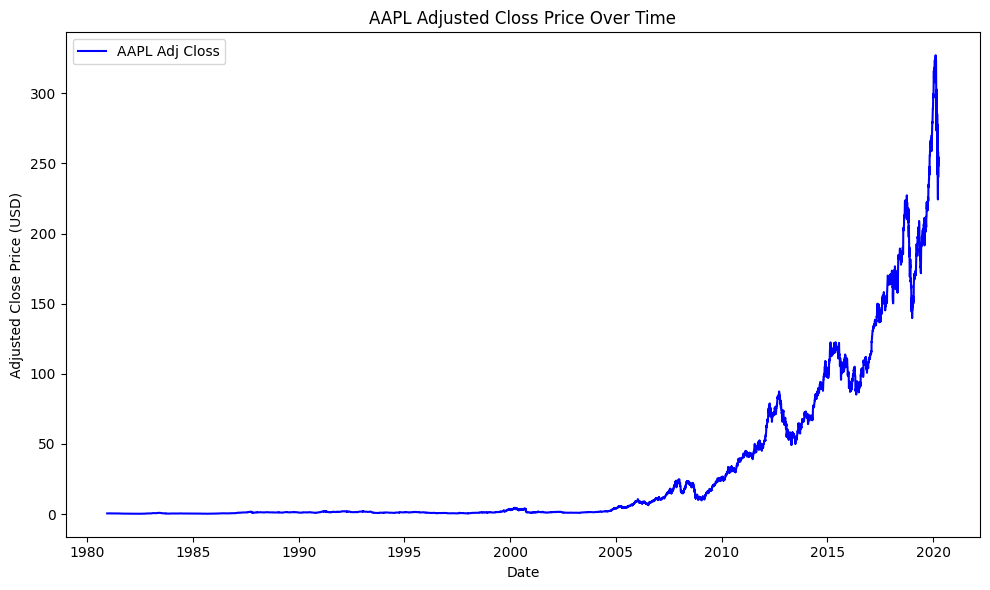

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(aapl_df.index, aapl_df['Adj Close'], label = 'AAPL Adj Closs', color = 'blue')
plt.title('AAPL Adjusted Closs Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

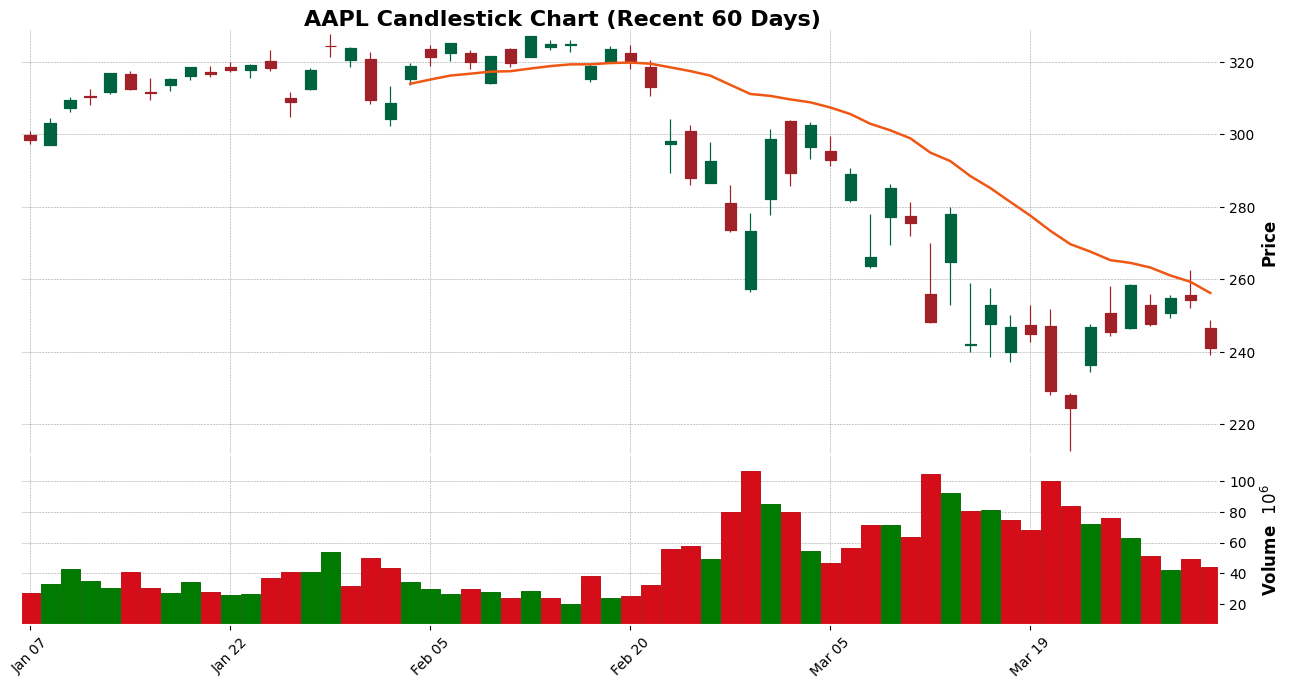

In [5]:
recent_df = aapl_df[-60:]
fig, axlist = mpf.plot(
    recent_df,
    type = 'candle',
    style = 'charles',
    # title = '\nAAPL Candlestick Chart (Recent 60 Days)',
    volume = True,
    mav = (20, 60),
    returnfig = True,
    figratio = (12, 6),
    figscale = 1.2,
    tight_layout = True
)

fig.suptitle(
    'AAPL Candlestick Chart (Recent 60 Days)',
    fontsize = 16,
    y = 1.0,
    ha = 'center'
)
plt.show()

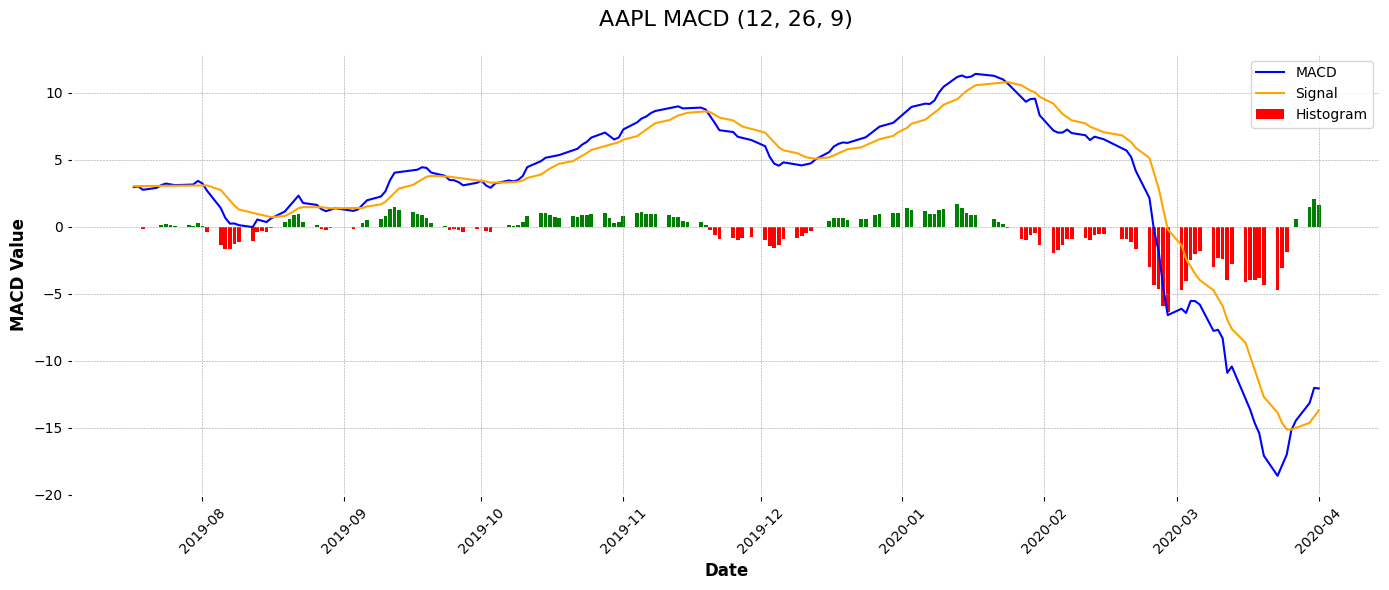

In [6]:
ema12 = aapl_df['Adj Close'].ewm(span = 12, adjust = False).mean()
ema26 = aapl_df['Adj Close'].ewm(span = 26, adjust = False).mean()
macd = ema12 - ema26
signal = macd.ewm(span = 9, adjust = False).mean()
histogram = macd - signal

recent = aapl_df.index[-180:]

plt.figure(figsize = (14, 6))
plt.plot(aapl_df.loc[recent].index, macd.loc[recent], label = 'MACD', color = 'blue', linewidth = 1.5)
plt.plot(aapl_df.loc[recent].index, signal.loc[recent], label = 'Signal', color = 'orange', linewidth = 1.5)
plt.bar(aapl_df.loc[recent].index, histogram.loc[recent], label = 'Histogram',
        color = ['green' if h > 0 else 'red' for h in histogram.loc[recent]])
plt.title('AAPL MACD (12, 26, 9)', fontsize = 16, pad = 20)
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

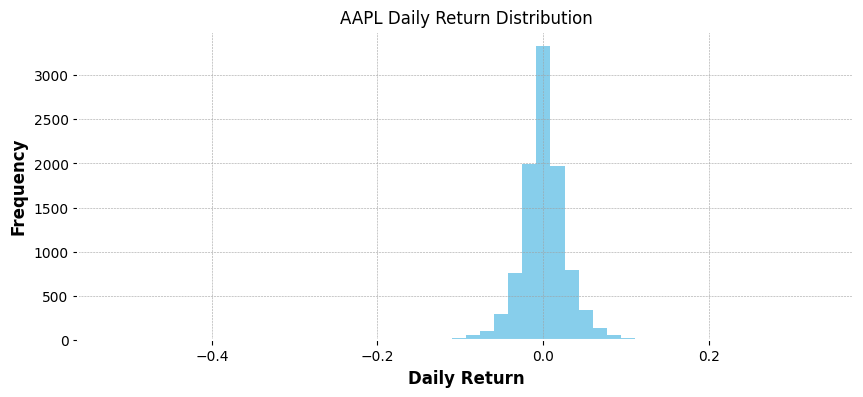

In [7]:
aapl_df['daily_return'] = aapl_df['Adj Close'].pct_change()

plt.figure(figsize = (10, 4))
aapl_df['daily_return'].hist(bins = 50, color = 'skyblue')
plt.title('AAPL Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

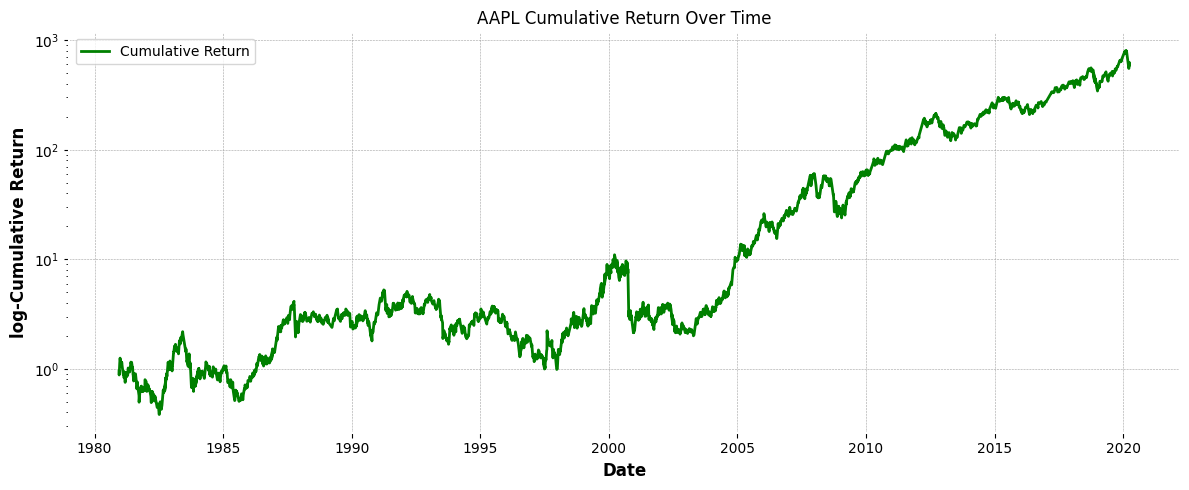

In [14]:
aapl_df['cumulative_return'] = (1 + aapl_df['daily_return']).cumprod()

plt.figure(figsize = (12, 5))
plt.plot(aapl_df['cumulative_return'], color = 'green', label = 'Cumulative Return')
plt.yscale('log')
plt.title('AAPL Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('log-Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
print(aapl_df['cumulative_return'].iloc[[0, -1]])


Date
1980-12-12           NaN
2020-04-01    592.234336
Name: cumulative_return, dtype: float64


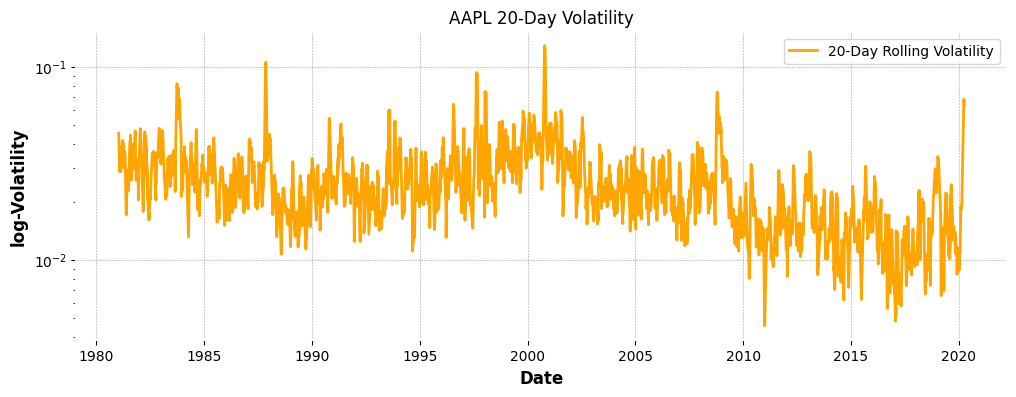

In [ ]:
aapl_df['volatility_20d'] = aapl_df['daily_return'].rolling(window = 20).std()

plt.figure(figsize = (12, 4))
plt.plot(aapl_df['volatility_20d'], label = '20-Day Rolling Volatility', color = 'orange')
plt.title('AAPL 20-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

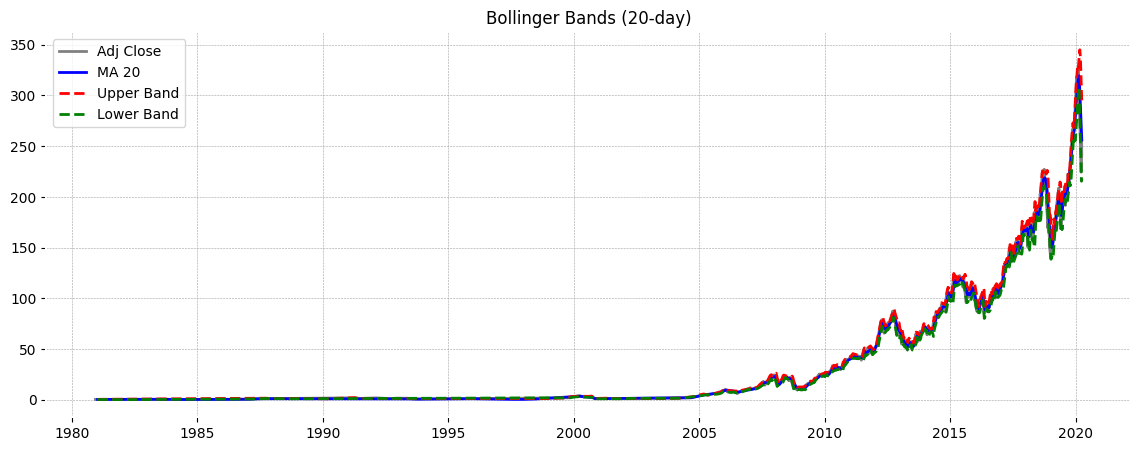

In [12]:
ma20 = aapl_df['Adj Close'].rolling(window = 20).mean()
std20 = aapl_df['Adj Close'].rolling(window = 20).std()
upper_band = ma20 + 2 * std20
lower_band = ma20 - 2 * std20

plt.figure(figsize = (14, 5))
plt.plot(aapl_df['Adj Close'], label = 'Adj Close', color = 'grey')
plt.plot(ma20, label = 'MA 20', color = 'blue')
plt.plot(upper_band, label = 'Upper Band', linestyle = '--', color = 'red')
plt.plot(lower_band, label = 'Lower Band', linestyle = '--', color = 'green')
plt.title('Bollinger Bands (20-day)')
plt.legend()
plt.grid(True)
plt.show()